In [13]:
import numpy as np
import pandas as pd
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
import matplotlib
import matplotlib.pyplot as plt

# two-class classification
data_red = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', dtype = None, delimiter=';')
data_white = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', dtype = None, delimiter=';')
print(data_red.shape)
print(data_white.shape)
# input / to_numpy -> table 안 숫자만 들어감
X0 = data_red.to_numpy()
X1 = data_white.to_numpy()

N0,D = X0.shape
N1,D = X1.shape

# target
t0 = np.zeros(N0, dtype = int)
t1 = np.ones(N1, dtype = int)

# 전체 dataset
X = np.vstack((X0, X1)) # input, 12차원 입력
t = np.hstack((t0, t1)) # output, target, {0, 1}로 구분    t는 벡터 

# 정규화
scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(X)

print(X.shape)
# train / test 쪼개기
X_train,X_test,t_train,t_test = train_test_split(X, t, test_size = 0.20)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)



(1599, 12)
(4898, 12)
(6497, 12)


Text(0, 0.5, 'accuracy [%]')

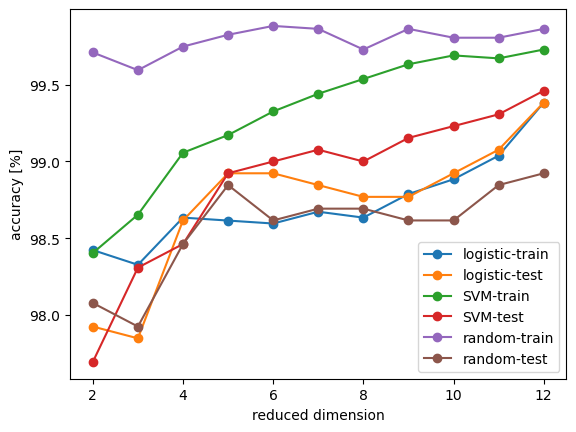

In [14]:
#PCA

C = np.cov(X_train, rowvar = False)
U, s, V = np.linalg.svd(C)
S = np.diag(s)
V = V.T

dimlist = np.arange(2, 13)

#Logistic
accuracy_train_logistic = []
accuracy_test_logistic = []

for dim_reduction in dimlist:

    Z_train = X_train.dot(U[:,0:dim_reduction])
    Z_test = X_test.dot(U[:,0:dim_reduction])

    model1 = LogisticRegression(max_iter = 5000)
    model1.fit(Z_train,t_train)

    y_train = model1.predict(Z_train)
    y_test = model1.predict(Z_test)

    accuracy_train_logistic.append(accuracy_score(y_train, t_train)*100)
    accuracy_test_logistic.append(accuracy_score(y_test, t_test)*100)     

plt.figure()
plt.plot(dimlist, accuracy_train_logistic, 'o-', label = 'logistic-train')
plt.plot(dimlist, accuracy_test_logistic, 'o-', label = 'logistic-test')   
plt.legend()

#SVM
accuracy_train_SVM = []
accuracy_test_SVM = []

for dim_reduction in dimlist:

    Z_train = X_train.dot(U[:,0:dim_reduction])
    Z_test = X_test.dot(U[:,0:dim_reduction])

    model2 = svm.SVC(kernel = 'rbf')
    model2.fit(Z_train,t_train)

    y_train = model2.predict(Z_train)
    y_test = model2.predict(Z_test)

    accuracy_train_SVM.append(accuracy_score(y_train, t_train)*100)
    accuracy_test_SVM.append(accuracy_score(y_test, t_test)*100)    
plt.plot(dimlist, accuracy_train_SVM, 'o-', label = 'SVM-train')
plt.plot(dimlist, accuracy_test_SVM, 'o-', label = 'SVM-test') 
plt.legend()

#RANDOM
accuracy_train_R = []
accuracy_test_R = []

for dim_reduction in dimlist:

    Z_train = X_train.dot(U[:,0:dim_reduction])
    Z_test = X_test.dot(U[:,0:dim_reduction])

    model3 = RandomForestClassifier(n_estimators = 10, max_depth = 10)
    model3.fit(Z_train,t_train)

    y_train = model3.predict(Z_train)
    y_test = model3.predict(Z_test)

    accuracy_train_R.append(accuracy_score(y_train, t_train)*100)
    accuracy_test_R.append(accuracy_score(y_test, t_test)*100)    

plt.plot(dimlist, accuracy_train_R, 'o-', label = 'random-train')
plt.plot(dimlist, accuracy_test_R, 'o-', label = 'random-test') 
plt.legend()
plt.xlabel('reduced dimension')
plt.ylabel('accuracy [%]')